<a href="https://colab.research.google.com/github/RachelShalom/yandex-deep-learning/blob/master/DL_CNN_Ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## check cuda and GPU

In [0]:
# Do we have cuda?!
!which nvcc
!nvcc --version

/usr/local/cuda/bin/nvcc
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Tue_Jun_12_23:07:04_CDT_2018
Cuda compilation tools, release 9.2, V9.2.148


In [0]:
# Let's check if a GPU accelerator card is attached in our machine:
# This works too, GPU count and name
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-b84eeb60-4255-7506-fa13-f86c2fad724a)


In [0]:
!nvidia-smi

Sun Dec 30 08:26:11 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Install PyTorch


In [0]:
import sys
sys.version

%reset -f
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
import sys
sys.version



!pip3 install 'torch==0.4.0'
!pip3 install 'torchvision==0.2.1'
!pip3 install --no-cache-dir -I 'pillow==5.1.0'

# Restart Kernel
# This workaround is needed to properly upgrade PIL on Google Colab.
import os
os._exit(0)

    100% |████████████████████████████████| 2.0MB 52.2MB/s 


#import pytorch

In [0]:
import sys
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F 
import torchvision.transforms as transforms
print('__Python VERSION:', sys.version)
print('__CUDA VERSION')
print(torch.__version__)
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
# call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

use_cuda = torch.cuda.is_available()
# use_cuda = False
import random 
import numpy as np 

print("USE CUDA=" + str (use_cuda))
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
Tensor = FloatTensor
#fixing the random seed
manualSeed = 888
def fixSeed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if use_cuda:
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)


if manualSeed is None:
        manualSeed = 888
fixSeed(manualSeed)



__Python VERSION: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
__CUDA VERSION
0.4.0
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Tue_Jun_12_23:07:04_CDT_2018
Cuda compilation tools, release 9.2, V9.2.148
__CUDNN VERSION: 7102
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0
USE CUDA=True


# Initialize Hyper-parameters

#Download the data

The dataset  contain images  plants belonging to 12 species at several growth stages. 
The goal of the competition is to create a classifier capable of determining a plant's species from a photo. The list of species is as follows
link to kaggle competition: https://www.kaggle.com/c/plant-seedlings-classification/data

###Export API key and download data from Kaggle
*italicized text*

In [0]:
!mkdir -p ~/.kaggle

In [0]:
%%file ~/.kaggle/kaggle.json
  
{"username":"rachelshalom","key":"5ea7fd1dd00813f7d98509418a938a59"}

Overwriting /root/.kaggle/kaggle.json


In [0]:
!pip install kaggle --upgrade
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c plant-seedlings-classification

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.1.1)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
 99% 1.59G/1.60G [00:21<00:00, 88.6MB/s]
100% 1.60G/1.60G [00:21<00:00, 79.6MB/s]


In [0]:
! ls 


sample_data  sample_submission.csv.zip	test.zip  train.zip


In [0]:
!mkdir seeds
!mv train.zip seeds/train.zip
!unzip seeds/train.zip 

mkdir: cannot create directory ‘seeds’: File exists
Archive:  seeds/train.zip
replace train/Fat Hen/5bdfa3a44.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train/Fat Hen/5bdfa3a44.png  
  inflating: train/Fat Hen/a86b9c0cd.png  
  inflating: train/Fat Hen/f3f6559bf.png  
  inflating: train/Fat Hen/946b48f62.png  
  inflating: train/Fat Hen/4d7fd4020.png  
  inflating: train/Fat Hen/2509e5bc5.png  
  inflating: train/Fat Hen/e2462573b.png  
  inflating: train/Fat Hen/7e98e4aa6.png  
  inflating: train/Fat Hen/075cb6666.png  
  inflating: train/Fat Hen/b43d0a350.png  
  inflating: train/Fat Hen/afac20b21.png  
  inflating: train/Fat Hen/4d2efbb45.png  
  inflating: train/Fat Hen/f0923dcd6.png  
  inflating: train/Fat Hen/180f41d53.png  
  inflating: train/Fat Hen/bfdeafadd.png  
  inflating: train/Fat Hen/ac6625b0f.png  
  inflating: train/Fat Hen/ba5c8f87f.png  
  inflating: train/Fat Hen/e7d278e0e.png  
  inflating: train/Fat Hen/efaab2370.png  
  inflating: train/Fat Hen/9

In [0]:
!ls seeds

train.zip


In [0]:
!ls train

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [0]:
import os
from glob import glob
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

dataset='train/' # 
data_dir= './' +  dataset

In [0]:
data_dir

'./train/'

### print a single image

In [0]:
imageList = glob(data_dir + '/**/*.png', recursive=True)

In [0]:
print("number of images {}".format(len(imageList)))

number of images 4750


(142, 142, 3)
(142, 142)


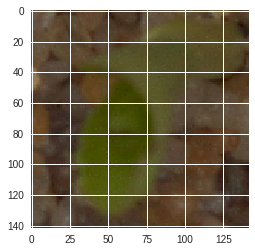

In [0]:
%matplotlib inline
import scipy.ndimage
im = Image.open(imageList[10],'r')
print(plt.imread(imageList[10]).shape)
print(im.size)
plt.imshow(im)

# Define the Dataset class

In [0]:
import os, sys, pdb, shutil, time, random
import argparse
import torch
import torch.backends.cudnn as cudnn
import torchvision.datasets as dset
import torchvision.transforms as transforms
#from utils import AverageMeter, RecorderMeter, time_string, convert_secs2time
# from tensorboard_logger import configure, log_value
from tqdm import tqdm
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as func
import torchvision
from torchvision import transforms, datasets, models
import random
from shutil import copyfile
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import time
from shutil import copyfile
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import numpy as np
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as func
import torchvision
from torchvision import transforms, datasets, models
import random
import sys
from glob import glob
import fnmatch

class GenericDataset(Dataset):
  def __init__(self, labels, root_dir, subset=False, transform=None):
    self.labels = labels
    self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    img_name = self.labels.iloc[idx, 0]  # file name
    fullname = join(self.root_dir, img_name)
    image = Image.open(fullname).convert('RGB')
    labels = self.labels.iloc[idx, 2]  # category_id
    #         print (labels)
    if self.transform:
      image = self.transform(image)
    return image, labels

  @staticmethod
  def find_classes(fullDir):
    classes = [d for d in os.listdir(fullDir) if os.path.isdir(os.path.join(fullDir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    num_to_class = dict(zip(range(len(classes)), classes))

    train = []
    for index, label in enumerate(classes):
      path = fullDir + label + '/'
      for file in listdir(path):
        train.append(['{}/{}'.format(label, file), label, index])

    df = pd.DataFrame(train, columns=['file', 'category', 'category_id', ])

    return classes, class_to_idx, num_to_class, df

In [0]:
classes, class_to_idx, num_to_class, df =GenericDataset.find_classes(data_dir )

print (classes)
print (class_to_idx)
print (num_to_class)
df.head(5)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
{0: 'Black-grass', 1: 'Charlock', 2: 'Cleavers', 3: 'Common Chickweed', 4: 'Common wheat', 5: 'Fat Hen', 6: 'Loose Silky-bent', 7: 'Maize', 8: 'Scentless Mayweed', 9: 'Shepherds Purse', 10: 'Small-flowered Cranesbill', 11: 'Sugar beet'}


,file,category,category_id
0,Black-grass/850a09a6b.png,Black-grass,0
1,Black-grass/c1ab59648.png,Black-grass,0
2,Black-grass/ab479d343.png,Black-grass,0
3,Black-grass/0d1a9985f.png,Black-grass,0
4,Black-grass/93f68d1a9.png,Black-grass,0


In [0]:
data_dir

'./train/'

### Data Loader

In [0]:
# input_size    = 784   # The image size = 28 x 28 = 784
# hidden_size   = 500   # The number of nodes at the hidden layer
num_classes   = 12    # The number of output classes. In this case,the names of plants
num_epochs    = 120    # The number of times entire dataset is trained
batch_size    = 8  # The size of input data took for one iteration
learning_rate = 0.001 # The speed of convergence

from torch.utils.data import DataLoader

### split the data to train valid test

In [0]:
#image_size = 224
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.1, random_state=888)
train_data, valid_data= train_test_split(train_data, test_size=0.1, random_state=888)
print("train size{} valid size{} test size{}".format(train_data.shape, valid_data.shape, test_data.shape))



train size(3847, 3) valid size(428, 3) test size(475, 3)


### Save the  train valid and test to csv files

In [0]:
train_data.to_csv("train_data.csv")
valid_data.to_csv("valid_data.csv")
test_data.to_csv("test_data.csv")
!ls 

sample_data		   seeds	  test.zip  train_data.csv
sample_submission.csv.zip  test_data.csv  train     valid_data.csv


### Normalization of images, train and valid transformations

In [0]:
image_size = 224
pop_mean=[0.3198478,0.2873943,0.19471176] #mean claculated on train 
pop_std0=[0.09954976,0.10399205,0.12163605]#std calculated on train 
#normalize_img = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
normalize_img = torchvision.transforms.Normalize(mean=pop_mean,std=pop_std0)

train_trans = transforms.Compose([transforms.RandomResizedCrop(image_size),
    transforms.RandomHorizontalFlip(),                       
    transforms.ToTensor(),
    normalize_img                            
])

## Normalization only for validation and test
valid_trans = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    normalize_img
   
])

#batch_size = 8


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


{'train': 3847, 'valid': 428, 'test': 475}
6     546
3     515
8     425
10    407
5     369
11    309
1     283
2     228
0     219
9     184
4     183
7     179
Name: category_id, dtype: int64


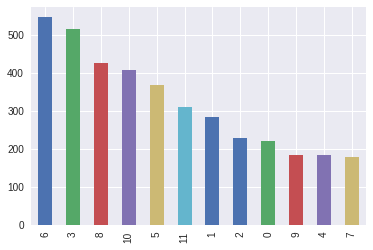

In [0]:
 
#dividing the data to train valid and test


train_set = GenericDataset(train_data, data_dir, transform = train_trans)
valid_set = GenericDataset(valid_data, data_dir, transform = valid_trans)
test_set=   GenericDataset(test_data, data_dir,transform = valid_trans) 

t_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4)
v_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader  = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=4)

dataset_sizes = {
    'train': len(t_loader.dataset), 
    'valid': len(v_loader.dataset),
    'test': len(test_loader.dataset)
}


print (dataset_sizes)
print (train_data["category_id"].value_counts())

train_data['category_id'].value_counts().plot(kind='bar')


##Test the data loader

i=0: 
torch.Size([8, 3, 224, 224]) tensor([  2,   0,   8,   6,   5,  10,   7,   5])
i=1: 
torch.Size([8, 3, 224, 224]) tensor([  4,  10,   1,   8,  11,   0,   6,   0])
i=2: 
torch.Size([8, 3, 224, 224]) tensor([  8,   6,   6,   1,   1,   5,  10,  10])
i=3: 
torch.Size([8, 3, 224, 224]) tensor([  5,   4,   6,  10,   3,   3,   8,   8])
i=4: 
torch.Size([8, 3, 224, 224]) tensor([  0,   6,   5,  10,  11,   5,   4,   3])
i=5: 
torch.Size([8, 3, 224, 224]) tensor([ 10,   8,   9,   6,   3,   8,   5,  10])


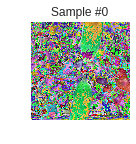

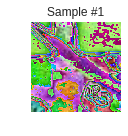

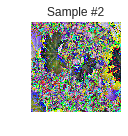

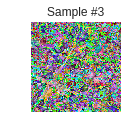

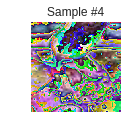

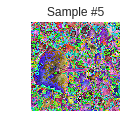

In [0]:
imagesToShow=6
import math
def flaotTensorToImage(img, mean=0, std=1):
        """convert a tensor to an image"""
        img = np.transpose(img.numpy(), (1, 2, 0))
        img = (img*std+ mean)*255
        img = img.astype(np.uint8)    
        return img    

if __name__ == '__main__':  
    for i, data in enumerate(t_loader, 0):
        print('i=%d: '%(i))            
        images, labels = data
        print(images.shape,labels)
        num = len(images)
        plt.figure(figsize=(10,10))
        ax = plt.subplot(1, imagesToShow, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{}'.format(i))
        ax.axis('off')

        for n in range(num):
            image=images[n]
            label=labels[n]
            #print(flaotTensorToImage(image).shape)
            plt.imshow (flaotTensorToImage(image))

        if i==imagesToShow-1:
            break

### Find the mean and std of the training data

In [0]:
# find the mean with batch size of train size
pop_mean = []
pop_std0 = []
#pop_std1 = []
for i, data in enumerate(t_loader, 0):
    # shape (batch_size, 3, height, width)
    images,labels=data
    numpy_image = images.numpy()
    #print( numpy_image.shape)
    
    # shape (3,)
    batch_mean = np.mean(numpy_image, axis=(0,2,3))
    batch_std0 = np.std(numpy_image, axis=(0,2,3))
    #batch_std1 = np.std(numpy_image, axis=(0,2,3), ddof=1)
    
    pop_mean.append(batch_mean)
    pop_std0.append(batch_std0)
    #pop_std1.append(batch_std1)
#     if i==4:
#           break

# shape (num_iterations, 3) -> (mean across 0th axis) -> shape (3,)
pop_mean = np.array(pop_mean).mean(axis=0)
pop_std0 = np.array(pop_std0).mean(axis=0)
#pop_std1 = np.array(pop_std1).mean(axis=0)
print(pop_mean, pop_std0)
#[-0.00652047 -0.02485048  0.03738929] [0.98131657 1.023082   0.9924733 ]
     

#* define the model Architecture
###LeNet

In [0]:
import torch.nn as nn
import torch.nn.functional as F


In [0]:
__all__ = ['lenetXX_generic']


class CNet(nn.Module):
    def __init__(self, num_classes=12, num_rgb=3):
        super(CNet, self).__init__()
        self.conv1 = nn.Conv2d(num_rgb, 6, 3) # 3 input chanels, 6 output channels( meaning 6 filters/kernels) each filter size is 5X5 or 3X3 adn a stride of 1
        self.conv2 = nn.Conv2d(6, 16, 3) # 6 input channels 16 filters of 5X5 or 3X3 size
        self.fc1 = nn.Linear(46656, 120)   #44944 input features, 120 output features
        self.fc2 = nn.Linear(120, 84)      #120 input features,84 output features
        self.fc3 = nn.Linear(84, num_classes) #84 input features,12 output features

        self.sig = nn.Sigmoid()

    def forward(self, x):
        out = F.leaky_relu(self.conv1(x)) #Computes the activation of the first convolution this changes the input from 3X224X224 to 6X222X222
        #print('output size after 1st conv. and relu:', out.size())
        out = F.max_pool2d(out, 2)
        #print('output size after maxpooling:', out.size())

        out = F.leaky_relu(self.conv2(out))
        #print('output size after second conv. and relu:', out.size())
        out = F.max_pool2d(out, 2)
        #print('output size after second maxpooling:', out.size())

        out = out.view(out.size(0), -1)
        # print(out.data.size())
        out = F.leaky_relu(self.fc1(out))
        out = F.leaky_relu(self.fc2(out))
        out = out.view(out.size(0), -1)
        # print(out.data.size())
        out = self.fc3(out)
        # out = self.sig(out)
        return out


# def CNetXX_generic(num_classes, num_rgb):
#     model = LeNet(num_classes, num_rgb)  # 56
#     return model

## Instantiate the model

In [0]:
model= CNet()
print(model)

CNet(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=12, bias=True)
  (sig): Sigmoid()
)


## choose the optimizer and loss function 
Loss function (criterion) decides how the output can be compared to a class, which determines how good or bad the neural network performs. And the optimizer chooses a way to update the weight in order to converge to find the best weights in this neural network

In [0]:
import torch.optim as optim
criterion= nn.CrossEntropyLoss() #loss function 
optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9)

print (criterion)
print (optimizer)

CrossEntropyLoss()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


##enable GPU


In [0]:
if use_cuda:
   model =model.cuda()

model_name = (type(model).__name__) # remember the real name
# model = torch.nn.DataParallel(model, device_ids=list(range(4)))
print(model)

CNet(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=12, bias=True)
  (sig): Sigmoid()
)


In [0]:
import datetime 
NOW_TIME = datetime.datetime.now()
NOW_TIME =NOW_TIME.strftime("%Y-%m-%d %H:%M")

use_tensorboard=False
print(NOW_TIME)

2019-01-10 09:48


## Training


In [0]:
from tqdm import tqdm 
from sklearn import metrics
import torch
import numpy as np
#from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
def train(train_loader, model, epoch, optimizer):
    if use_cuda:
        model.cuda()
        criterion.cuda()
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    acc = AverageMeter()
   
    # switch to train mode
    model.train()
    end = time.time()
    for batch_idx, (images, target) in enumerate(train_loader): 
        correct = 0
        # measure data loading time
        data_time.update(time.time() - end)

        if use_cuda:
            images, target = images.cuda(), target.cuda()
            images, target = Variable(images), Variable(target)
        # compute y_pred
        y_pred = model(images)
        loss = criterion(y_pred, target)
        #print('y_pred size: {},loss: {} '.format(y_pred.shape,loss))
         # measure accuracy and record loss
        prec1 = accuracy2(y_pred.data, target.data, topk=(1, 1))
        #print('prec1:{}'.format(prec1))
        losses.update(loss.data[0], images.size(0))
        #print('losses {}'.format(losses))
        acc.update(prec1[0], images.size(0))
        #print("acc: {}".format(acc))
        pred = y_pred.data.max(1)[1] # get the index of the probability
        #print("pred: {}".format(pred))
        correct += pred.eq(target.data).cpu().sum()
        accuracy = 100. * correct / len(images)
        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if batch_idx % 200  == 0:
            print('TRAIN: LOSS-->{loss.val:.4f} ({loss.avg:.4f})\t' 'ACC-->{acc.val:.3f}% ({acc.avg:.3f}%)'.format(loss=losses, acc=acc))
#             if use_tensorboard:
#                 exp.add_scalar_value('tr_epoch_loss', losses.avg, step=epoch)
#                 exp.add_scalar_value('tr_epoch_acc', acc.avg, step=epoch)
                
            print('TRAIN: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, Accuracy: {}/{} ({:.3f}%)'.format(
                epoch, batch_idx * len(images), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0],
                correct, len(images),
                accuracy))  
    return float('{loss.avg:.4f}'.format(loss=losses)), float('{acc.avg:.4f}'.format(acc=acc))  
  
  ##


In [0]:
train(t_loader, model,1,optimizer)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


TRAIN: LOSS-->2.4776 (2.4776)	ACC-->14.062% (14.062%)
TRAIN: 1 [0/3847 (0%)]	Loss: 2.477559, Accuracy: 9/64 (14.000%)


(2.1126, 27.294)

In [0]:
def validate(val_loader, model, epoch):
    if use_cuda:
        model.cuda()
        criterion.cuda()

    batch_time = AverageMeter()
    losses = AverageMeter()
    acc = AverageMeter()

    # switch to evaluate mode
    model.eval()

    end = time.time()
    for i, (images, labels) in enumerate(val_loader):

        if use_cuda:
            images, labels = images.cuda(), labels.cuda()
            images, labels = Variable(images, volatile=True), Variable(labels)

        # compute y_pred
        y_pred = model(images)
        loss = criterion(y_pred, labels)
        # measure accuracy and record loss
        prec1, temp_var = accuracy2(y_pred.data, labels.data, topk=(1, 1))
        losses.update(loss.data[0], images.size(0))
        acc.update(prec1[0], images.size(0))

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % 200== 0:
            print('VAL:   LOSS--> {loss.val:.4f} ({loss.avg:.4f})\t''ACC-->{acc.val:.3f} ({acc.avg:.3f})'.format(loss=losses, acc=acc))
#         if i % 50 == 0:
#             if use_tensorboard:
#                 exp.add_scalar_value('val_epoch_loss', losses.avg, step=epoch)
#                 exp.add_scalar_value('val_epoch_acc', acc.avg, step=epoch)

    print(' * Accuracy {acc.avg:.4f}'.format(acc=acc))
    return float('{loss.avg:.6f}'.format(loss=losses)), float('{acc.avg:.6f}'.format(acc=acc))

In [0]:
validate(v_loader, model,1)

## Train the model

In [0]:
start_training_time = time.time()
recorder = RecorderMeter(num_epochs)  # epoc is updated
training_time=time.time()
model_name = (type(model).__name__)
exp_name = datetime.datetime.now().strftime(model_name + '_' + dataset + '_%Y-%m-%d_%H-%M-%S')    
mPath = './logs' + '/' + dataset + '/' + model_name + '/'    
if not os.path.isdir(mPath):
    os.makedirs(mPath)
train_losses=[]
train_scores=[]
val_losses=[]
val_scores=[]
#Time for starting
training_start_time = time.time()

for epoch in tqdm(range(0, num_epochs)): 
  
    train_result, accuracy_tr=train(t_loader, model, epoch, optimizer)
    val_loss, val_accuracy= validate(v_loader, model, epoch)  
    train_losses.append(train_result);train_scores.append(accuracy_tr)
    val_losses.append(val_loss);val_scores.append(val_accuracy)
    recorder.update(epoch, train_result, accuracy_tr, val_loss, val_accuracy) 
    
#     recorder.plot_curve(os.path.join(mPath, model_name + '_' + exp_name + '.png'),training_time, model, model_name,
#                         str(dataset_sizes),
#                     batch_size, learning_rate,dataset,manualSeed,len(classes))

    if float(val_accuracy) > float(99.0):            
        print ("EARLY STOP")            
        df_pred=testModel()
        df_pred.to_csv(str(type(model).__name__) + '_' + str(val_accuracy) + '_' + 
                       str(epoch) + "_sub.csv", columns=('file', 'species'), index=None)
        torch.save(model.state_dict(), os.path.join(mPath, model_name + '_' + runId + '_' + str(val_accuracy) + '_.pth'))
print("Training finished, took {:.2f}s".format(time.time() - training_start_time))


##Test the model 

In [0]:


# Performance monitoring
from time import process_time
import matplotlib.pyplot as plt
import numpy as np

def test(model) :
    model.eval()
    "Displays a synthetic matrix, which represents our classifier performances."
    y_test    = [] ; y_pred    = [] ; 
    for data, target in test_loader: # We won't load the testing dataset all at once:
        # Load the data on the GPU if needed, and wrap it into an autodiff object ----
        if use_cuda: data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        # Evaluation of our model on the test mini-batch -----------------------------
        output     = model(data) # Forward pass through the model
        pred       = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        y_test.append(target.data.cpu().numpy())  
        y_pred.append(pred.view(-1).cpu().numpy())
        
    y_test = np.hstack(y_test)  
    y_pred = np.hstack(y_pred)
    accuracy=np.sum((y_test==y_pred))/len(y_test)
    print('test: {} prediction:{}'.format(y_test.shape, y_test.shape))
    print('acc:',accuracy)
    

In [0]:
test(model)
print(train_losses)
print(train_scores)
print(val_losses)
print(val_scores)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  if sys.path[0] == '':


test: (475,) prediction:(475,)
acc: 0.9010526315789473
[2.1579, 1.6882, 1.5121, 1.4784, 1.3633, 1.3264, 1.2803, 1.2209, 1.162, 1.097, 1.0409, 1.0325, 0.9778, 0.9636, 0.923, 0.8808, 0.8959, 0.8645, 0.8205, 0.8254, 0.8006, 0.8022, 0.7856, 0.774, 0.7621, 0.7441, 0.7475, 0.7212, 0.7404, 0.6745, 0.7081, 0.6683, 0.6523, 0.6696, 0.6845, 0.6962, 0.648, 0.6561, 0.6121, 0.6503, 0.6371, 0.6402, 0.6065, 0.6316, 0.6199, 0.6087, 0.6039, 0.5818, 0.6203, 0.6009, 0.5792, 0.5738, 0.5454, 0.5899, 0.5742, 0.5702, 0.561, 0.5463, 0.5607, 0.5978, 0.567, 0.5619, 0.5346, 0.5295, 0.5342, 0.5126, 0.5055, 0.528, 0.5122, 0.5342, 0.5072, 0.5013, 0.5199, 0.4895, 0.4986, 0.5277, 0.4852, 0.4971, 0.5337, 0.5208, 0.4955, 0.4989, 0.5028, 0.5241, 0.5035, 0.4822, 0.4872, 0.5121, 0.4666, 0.4981, 0.4788, 0.4968, 0.4591, 0.5138, 0.4848, 0.5141, 0.4837, 0.4789, 0.4679, 0.4656, 0.4546, 0.4794, 0.4917, 0.4566, 0.4639, 0.4752, 0.4447, 0.4558, 0.442, 0.4908, 0.487, 0.4333, 0.4356, 0.4712, 0.4686, 0.4519, 0.442, 0.4544, 0.46, 0.441

### Save model

In [0]:
##save the model with torch 
# Print model's state_dict
print("Model's state_dict:")
from google.colab import drive
model_name=type(model).__name__
accuracy="_accuracy_"
drive.mount('/content/gdrive')
model.eval()
PATH= "/content/gdrive/My Drive/" + model_name+accuracy+".pt"

# for param_tensor in model.state_dict():
#     print(param_tensor, "\t", model.state_dict()[param_tensor].size())
torch.save(model.state_dict(),PATH)
print(type(model).__name__)

Model's state_dict:
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
CNet


In [0]:
%matplotlib inline
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(range(len(train_losses)),train_losses,label="train_loss")
plt.plot(range(len(val_losses)),val_losses,label="val loss")
plt.legend(loc='upper right')
plt.subplot(122)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.plot(range(len(train_scores)),train_scores,label="train Accuracy")
plt.plot(range(len(val_scores)),val_scores,label="val Accuracy")
plt.legend(loc='upper left')

NameError: ignored

### Load model

In [0]:
model_load_name = model_name+accuracy+".pt"
path = "gdrive/My Drive/" + model_load_name
# path = "gdrive"
# path = os.path.join("gdrive", "My Drive")
# !ls -la {path}
model = init_net_cuda()
model.load_state_dict(torch.load(path))
model.eval()

In [0]:
[1.8119, 1.6806, 1.6513, 1.5685, 1.5309, 1.5138, 1.4839, 1.4578, 1.4366, 1.4387, 1.3803, 1.3757, 1.364, 1.3362, 1.3098, 1.3039, 1.2787, 1.2978, 1.2448, 1.2722, 1.2072, 1.2205, 1.1835, 1.1727, 1.1721, 1.124, 1.1286, 1.1133, 1.1074, 1.0629, 1.0098, 1.0194, 0.9907, 0.9667, 0.9623, 0.924, 0.9141, 0.8804, 0.9005, 0.8572, 0.8679, 0.8487, 0.8843, 0.8664, 0.8058, 0.8234, 0.8232, 0.7842, 0.7764, 0.8089, 0.7815, 0.785, 0.7518, 0.763, 0.7443, 0.7275, 0.7409, 0.7401, 0.7414, 0.7252, 0.7352, 0.699, 0.7028, 0.6651, 0.7144, 0.6823, 0.6889, 0.7025, 0.6854, 0.6521, 0.6714, 0.6942, 0.6525, 0.6637, 0.6838, 0.6594, 0.6256, 0.6505, 0.6318, 0.6249, 0.6495, 0.6646, 0.6089, 0.6423, 0.5975, 0.6348, 0.5998, 0.6411, 0.5783, 0.5914, 0.609, 0.5854, 0.6097, 0.6151, 0.6106, 0.5629, 0.6084, 0.6082, 0.5784, 0.5427]
[37.1711, 43.3224, 44.0789, 45.8882, 45.8553, 48.0263, 49.0132, 50.1316, 51.875, 50.8224, 52.9605, 52.7303, 53.1579, 54.1447, 55.3618, 54.9013, 56.2171, 55.8224, 57.3026, 56.8421, 58.6842, 58.5197, 61.1842, 59.9013, 60.4276, 61.2171, 61.7434, 61.3816, 62.3684, 62.8289, 64.8026, 65.625, 66.3487, 66.875, 67.3684, 67.5987, 68.8158, 70.1316, 68.8487, 70.4276, 70.4605, 70.6908, 69.2105, 70.4276, 71.25, 72.2368, 71.9737, 71.8092, 73.2566, 72.3355, 73.4539, 73.0592, 74.1776, 74.0789, 73.7829, 74.9671, 73.75, 73.8816, 74.8355, 75.6908, 74.3092, 75.5592, 75.3618, 76.6776, 75.2303, 75.8553, 75.3289, 75.625, 75.7895, 77.0066, 76.0526, 75.5263, 77.6645, 77.4342, 76.6447, 76.8421, 77.9605, 77.9276, 78.4211, 77.6645, 77.8289, 76.5461, 78.3553, 77.8947, 79.2105, 78.1908, 79.6382, 77.7961, 80.2303, 79.8026, 79.7368, 80.0, 78.9474, 78.7829, 78.7829, 80.3947, 79.0132, 78.8487, 79.5395, 80.7237]
[1.561081, 1.348939, 1.537089, 1.264429, 1.354813, 1.345447, 1.261129, 1.226318, 1.134298, 1.357422, 1.082524, 1.041632, 0.995489, 1.070367, 1.026235, 0.929131, 0.933627, 1.007095, 0.940273, 0.923851, 1.559156, 0.856796, 0.950177, 0.865695, 0.856, 0.835708, 0.779149, 0.920065, 0.847571, 0.671595, 0.69315, 0.765997, 0.651382, 0.691398, 0.712276, 0.689691, 0.65297, 0.691603, 0.593585, 0.613337, 0.568009, 0.610768, 0.582418, 0.605717, 0.543109, 0.574069, 0.593469, 0.57694, 0.53813, 0.535058, 0.494549, 0.6972, 0.500335, 0.488561, 0.453424, 0.59644, 0.555237, 0.466475, 0.473014, 0.495331, 0.508228, 0.409555, 0.46224, 0.467198, 0.541837, 0.499747, 0.476262, 0.448856, 0.376788, 0.475744, 0.603359, 0.418477, 0.427971, 0.428928, 0.419723, 0.581208, 0.408394, 0.469547, 0.447197, 0.405853, 0.417875, 0.501412, 0.454698, 0.495673, 0.494839, 0.454819, 0.405554, 0.423367, 0.411336, 0.510936, 0.494268, 0.407181, 0.415074, 0.463426, 0.429475, 0.46338, 0.612974, 0.506019, 0.4539, 0.586925]
[51.315792, 54.210529, 44.078949, 59.078949, 53.815792, 55.000004, 54.736843, 57.500004, 62.105267, 50.921055, 61.84211, 63.157898, 66.052635, 64.473686, 64.210526, 69.210526, 68.421059, 65.921059, 66.84211, 69.868423, 47.63158, 72.5, 66.052635, 70.657898, 69.736847, 70.394737, 73.289474, 66.447372, 72.105263, 77.894737, 76.052635, 74.605263, 79.078949, 76.84211, 75.131584, 77.5, 77.631584, 75.921059, 79.34211, 79.605263, 79.868423, 78.421059, 78.421059, 80.0, 82.368423, 81.052635, 80.263161, 79.605263, 79.078949, 80.526321, 82.368423, 75.657898, 83.421059, 83.026321, 83.289474, 78.815796, 80.921059, 83.421059, 84.736847, 82.5, 80.921059, 85.526321, 83.552635, 84.736847, 80.789474, 80.657898, 83.815796, 83.552635, 87.10527, 83.947372, 79.605263, 85.263161, 84.34211, 85.657898, 84.868423, 80.789474, 84.473686, 83.289474, 84.736847, 84.736847, 85.0, 83.157898, 84.34211, 83.947372, 83.552635, 84.34211, 86.184212, 84.736847, 85.263161, 83.684212, 83.157898, 86.184212, 86.184212, 84.078949, 85.657898, 84.078949, 81.315796, 84.60527, 85.526321, 81.84211]

##submit the file to kaggle competition

In [0]:
!mv test.zip seeds/test.zip
!unzip seeds/test.zip 

In [0]:
!ls

gdrive	     sample_submission.csv	seeds	       train
logs	     sample_submission.csv.zip	test	       train_data.csv
sample_data  seedlings.csv		test_data.csv  valid_data.csv


In [0]:

sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.columns = ['file', 'species']
print(sample_submission.head(3))
def testImageLoader(image_name):
    """load image, returns cuda tensor"""
#     image = Image.open(image_name)
    image = Image.open(image_name).convert('RGB')
    image = valid_trans(image)
#     image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  
    if use_cuda:
#         print ("cuda")
        image.cuda()         
    return image
def testModel(test_dir, local_model):    
    if use_cuda:
        local_model.cuda()
    
    local_model.eval()
    
    columns = ['file', 'species']
    df_pred = pd.DataFrame(data=np.zeros((0, len(columns))), columns=columns)
#     df_pred.species.astype(int)
    for index, row in (sample_submission.iterrows()):
#         for file in os.listdir(test_dir):            
        currImage=os.path.join(test_dir, row['file'])
        if os.path.isfile(currImage):
            X_tensor_test=testImageLoader (currImage)            
#             print (type(X_tensor_test))
            if use_cuda:
                X_tensor_test = Variable(X_tensor_test.cuda()) 
            else:
                X_tensor_test = Variable(X_tensor_test)        
            
            # get the index of the max log-probability
            predicted_val = (local_model(X_tensor_test)).data.max(1)[1] # get the index of the max log-probability
#             predicted_val = predicted_val.data.max(1, keepdim=True)[1]
            p_test = (predicted_val.cpu().numpy().item())
            df_pred = df_pred.append({'file': row['file'], 'species': num_to_class[int(p_test)]}, ignore_index=True)             
    
    return df_pred
  

            file     species
0  0021e90e4.png  Sugar beet
1  003d61042.png  Sugar beet
2  007b3da8b.png  Sugar beet


In [0]:
submission=testModel("test",model)
submission.head()


NameError: ignored

In [0]:
csv_name="seedsNames.csv"
submission.to_csv(csv_name, index=None)
!ls {csv_name}
 # sanity check
check = pd.read_csv(csv_name)
check.head()


seedsNames.csv


,file,species
0,0021e90e4.png,Small-flowered Cranesbill
1,003d61042.png,Fat Hen
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Common Chickweed
4,00c47e980.png,Sugar beet


In [0]:
MESSAGE="My first  classification"
#COMPETITION=
!kaggle competitions submit -c plant-seedlings-classification -f seedsNames.csv -m "Message"
#kaggle competitions submit [-h] -c COMPETITION -f FILE -m MESSAGE

100% 22.4k/22.4k [00:10<00:00, 2.20kB/s]
Successfully submitted to Plant Seedlings Classification

##File utils

In [0]:
import os, sys, time
import numpy as np
import matplotlib
import torch
import random

# matplotlib.use('agg')
import matplotlib.pyplot as plt

class AverageMeter(object):
  """Computes and stores the average and current value"""
  def __init__(self):
    self.reset()

  def reset(self):
    self.val = 0
    self.avg = 0
    self.sum = 0
    self.count = 0

  def update(self, val, n=1):
    self.val = val
    self.sum += val * n
    self.count += n
    self.avg = self.sum / self.count


def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60.
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

class RecorderMeter(object):
    """Computes and stores the minimum loss value and its epoch index"""

    def __init__(self, total_epoch):
        self.reset(total_epoch)

    def reset(self, total_epoch):
        assert total_epoch > 0
        self.total_epoch = total_epoch
        self.current_epoch = 0
        self.epoch_losses = np.zeros((self.total_epoch, 2), dtype=np.float32)  # [epoch, train/val]
        self.epoch_losses = self.epoch_losses - 1

        self.epoch_accuracy = np.zeros((self.total_epoch, 2), dtype=np.float32)  # [epoch, train/val]
        self.epoch_accuracy = self.epoch_accuracy

    def update(self, idx, train_loss, train_acc, val_loss, val_acc):
        assert idx >= 0 and idx < self.total_epoch, 'total_epoch : {} , but update with the {} index'.format(
            self.total_epoch, idx)
        self.epoch_losses[idx, 0] = train_loss
        self.epoch_losses[idx, 1] = val_loss
        self.epoch_accuracy[idx, 0] = train_acc
        self.epoch_accuracy[idx, 1] = val_acc
        self.current_epoch = idx + 1
        return self.max_accuracy(False) == val_acc

    def max_accuracy(self, istrain):
        if self.current_epoch <= 0: return 0
        if istrain:
            return self.epoch_accuracy[:self.current_epoch, 0].max()
        else:
            return self.epoch_accuracy[:self.current_epoch, 1].max()


    def plot_curve(self, save_path, training_time, model, model_name, s_size,batch_size, learning_rate,dataset,manualSeed,num_classes):
        title = 'PyTorch T-TIME:{}'.format(hms_string(training_time)) + ',Net:' + str(model_name).upper() + ',LR:' + str(learning_rate) +  ',DataSet:' + str(dataset).upper() + ',' + '\n'\
                + ',Params: %.2fM' % (sum(p.numel() for p in model.parameters()) / 1000000.0) + ',Seed: %.2f' % manualSeed + \
                ",Torch: {}".format(torch.__version__) + ", Batch:{}".format(batch_size) + ", Samples:{}".format(s_size) +  ", Classes:{}".format(num_classes)

        dpi = 80
        width, height = 1200, 800
        legend_fontsize = 14
        scale_distance = 48.8
        figsize = width / float(dpi), height / float(dpi)

        fig = plt.figure(figsize=figsize)
        x_axis = np.array([i for i in range(self.total_epoch)])  # epochs
        y_axis = np.zeros(self.total_epoch)

        plt.xlim(0, self.total_epoch)
        plt.ylim(0, 1.0)
        interval_y = 0.05 / 3.0
        interval_x = 1
        plt.xticks(np.arange(0, self.total_epoch + interval_x, interval_x))
        plt.yticks(np.arange(0, 1.0 + interval_y, interval_y))
        plt.grid()
        plt.title(title, fontsize=18)
        plt.xlabel('EPOCH', fontsize=16)
        plt.ylabel('LOSS/ACC', fontsize=16)

        y_axis[:] = self.epoch_accuracy[:, 0] / 100.0
        plt.plot(x_axis, y_axis, color='g', linestyle='-', label='tr-accuracy/100', lw=2)
        plt.legend(loc=4, fontsize=legend_fontsize)

        y_axis[:] = self.epoch_accuracy[:, 1] / 100.0
        plt.plot(x_axis, y_axis, color='y', linestyle='-', label='val-accuracy/100', lw=2)
        plt.legend(loc=4, fontsize=legend_fontsize)

        y_axis[:] = self.epoch_losses[:, 0]
        plt.plot(x_axis, y_axis, color='r', linestyle=':', label='tr-loss', lw=2)
        plt.legend(loc=4, fontsize=legend_fontsize)

        y_axis[:] = self.epoch_losses[:, 1]
        plt.plot(x_axis, y_axis, color='b', linestyle=':', label='val-loss', lw=4)
        plt.legend(loc=4, fontsize=legend_fontsize)

        if save_path is not None:
            fig.savefig(save_path, dpi=dpi, bbox_inches='tight')
            # print('---- save figure {} into {}'.format(title, save_path))
        plt.close(fig)

def time_string():
  ISOTIMEFORMAT='%Y-%m-%d %X'
  string = '[{}]'.format(time.strftime( ISOTIMEFORMAT, time.gmtime(time.time()) ))
  return string

def convert_secs2time(epoch_time):
  need_hour = int(epoch_time / 3600)
  need_mins = int((epoch_time - 3600*need_hour) / 60)
  need_secs = int(epoch_time - 3600*need_hour - 60*need_mins)
  return need_hour, need_mins, need_secs

def time_file_str():
  ISOTIMEFORMAT='%Y-%m-%d'
  string = '{}'.format(time.strftime( ISOTIMEFORMAT, time.gmtime(time.time()) ))
  return string + '-{}'.format(random.randint(1, 10000))

def accuracy2(output, target, topk=(1,)):
  """Computes the precision@k for the specified values of k"""
  maxk = max(topk)
  batch_size = target.size(0)

  _, pred = output.topk(maxk, 1, True, True)
  pred = pred.t()
  correct = pred.eq(target.view(1, -1).expand_as(pred))

  res = []
  for k in topk:
    correct_k = correct[:k].view(-1).float().sum(0)
    res.append(correct_k.mul_(100.0 / batch_size))
  return res

In [0]:
class RandomErasing(object):
    def __init__(self, EPSILON = 0.5, sl = 0.02, sh = 0.4, r1 = 0.3, mean=[0.4914, 0.4822, 0.4465]):
        self.EPSILON = EPSILON
        self.mean = mean
        self.sl = sl
        self.sh = sh
        self.r1 = r1
       
    def __call__(self, img):

        if random.uniform(0, 1) > self.EPSILON:
            return img

        for attempt in range(100):
            area = img.size()[1] * img.size()[2]
       
            target_area = random.uniform(self.sl, self.sh) * area
            aspect_ratio = random.uniform(self.r1, 1/self.r1)

            h = int(round(math.sqrt(target_area * aspect_ratio)))
            w = int(round(math.sqrt(target_area / aspect_ratio)))

            if w <= img.size()[2] and h <= img.size()[1]:
                x1 = random.randint(0, img.size()[1] - h)
                y1 = random.randint(0, img.size()[2] - w)
                if img.size()[0] == 3:
                    #img[0, x1:x1+h, y1:y1+w] = random.uniform(0, 1)
                    #img[1, x1:x1+h, y1:y1+w] = random.uniform(0, 1)
                    #img[2, x1:x1+h, y1:y1+w] = random.uniform(0, 1)
                    img[0, x1:x1+h, y1:y1+w] = self.mean[0]
                    img[1, x1:x1+h, y1:y1+w] = self.mean[1]
                    img[2, x1:x1+h, y1:y1+w] = self.mean[2]
                    #img[:, x1:x1+h, y1:y1+w] = torch.from_numpy(np.random.rand(3, h, w))
                else:
                    img[0, x1:x1+h, y1:y1+w] = self.mean[1]
                    # img[0, x1:x1+h, y1:y1+w] = torch.from_numpy(np.random.rand(1, h, w))
                return img

        return img